In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## (Lecture 11 Cont'd) Empirical Distribution of a Statistic ##

In [2]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [3]:
# Let's look at the true population median (parameter)
# Recall that we'll be attempting to estimate this value using random samples
np.median(united.column("Delay"))

2.0

In [4]:
# A function that takes a sample size & returns a the median delay of a random sample of that size
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [5]:
# Call the function with a sample size = 10
sample_median(10)

-1.5

In [6]:
# Call the function 1,000 times with a sample size = 10 & store the results
results = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    results = np.append(results, new_median)

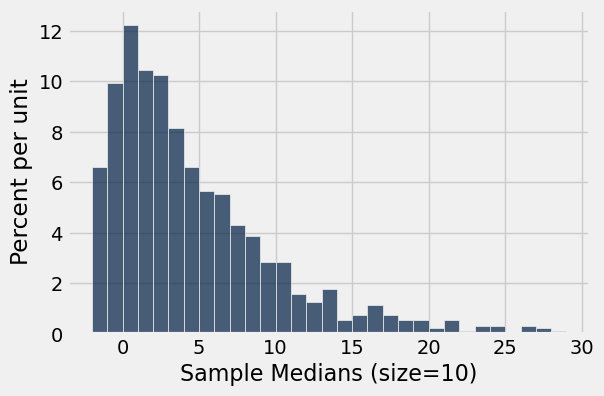

In [7]:
# Show the empirical distribution of sample size = 10 (use bins = 20)
Table().with_column('Sample Medians (size=10)', results).hist(bins=np.arange(-2, 30))

In [8]:
# Call the function 1,000 times with a sample size = 10 & store the results
results = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    results = np.append(results, new_median)

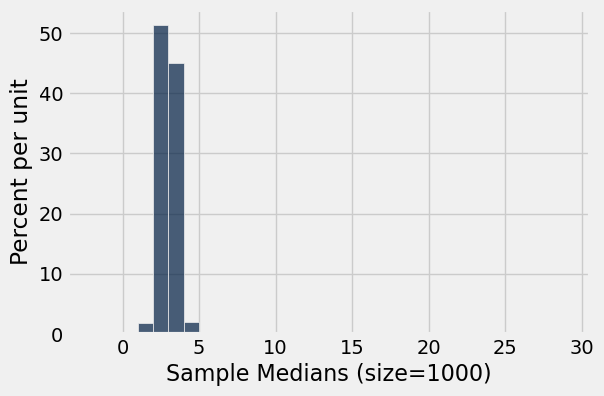

In [9]:
# Show the empirical distribution of sample size = 1,000 (use bins = np.arange(-2, 30))
Table().with_column('Sample Medians (size=1000)', results).hist(bins=np.arange(-2, 30))

#### Empirical Distributions of a Statistic (Overlayed)

In [10]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 1000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [11]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

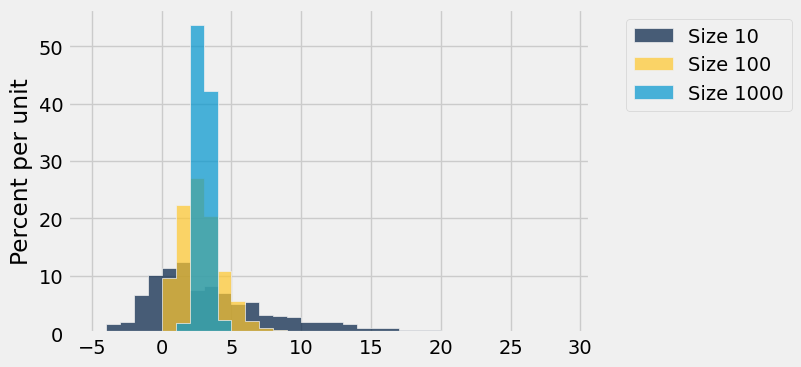

In [12]:
sample_medians.hist(bins = np.arange(-5, 30))

## The Case of the Fake Data ##

In [13]:
# Create the probability distribution
theoretical_proportions = make_array(1/36, 35/36)
theoretical_proportions

array([0.02777778, 0.97222222])

In [14]:
# Simulate an empirical distribution
sample_proportions(100, theoretical_proportions)

array([0.05, 0.95])

In [15]:
# A function that simulates 100 games & returns how many times "snake eyes" is rolled in those 100 games
def simulated_snake_eyes():
    return sample_proportions(100, theoretical_proportions).item(0) * 100

In [16]:
# Call the function
# This represents one round of 100 games
simulated_snake_eyes()

1.0

In [17]:
# Call the function 10,000 times & store the results
# We simulate 10,000 rounds where each round is 100 games
num_snake_eyes = make_array()

for i in np.arange(10000):
    new_sim = simulated_snake_eyes()
    num_snake_eyes = np.append(num_snake_eyes, new_sim)

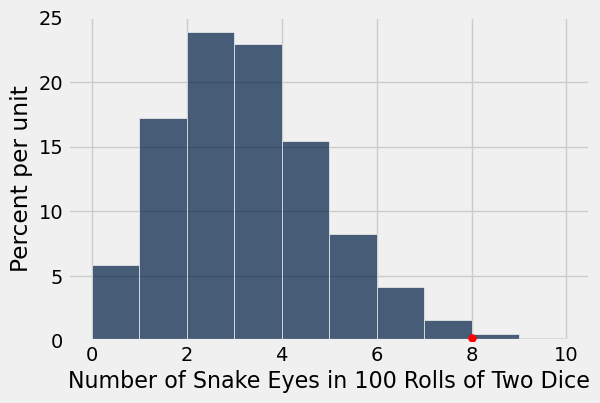

In [18]:
# Create a histogram of the snake eyes statistics
Table().with_column(
    'Number of Snake Eyes in 100 Rolls of Two Dice', num_snake_eyes
).hist()

# Plotting details; ignore this code
plots.scatter(8, 0.002, color='red', s=30, zorder=10);

## Mendel and Pea Flowers ##

In [19]:
# Create Mendel's empirical distribution
# Mendel had 929 plants, 709 of which had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [20]:
# Create a probability distribution
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([0.7621098, 0.2378902])

In [21]:
# A function that simulates a sample of 929 plants
# Why 929 plants?
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [22]:
# Call the function
purple_flowers()

77.07212055974165

In [23]:
# Call the function 10,000 times & store the result
# We simulate 10,000 "experiments" where each experiment has 929 plants
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

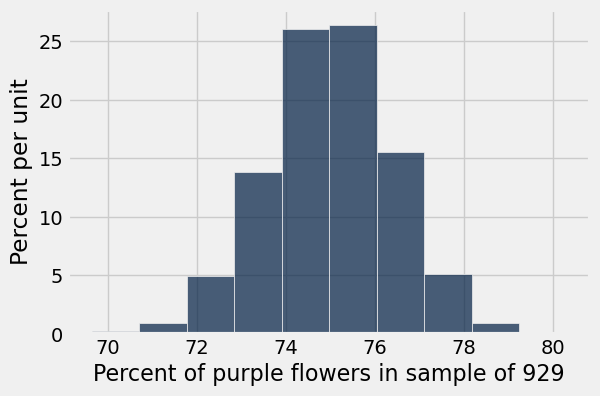

In [24]:
# Create a histogram of the simulated statistics
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

In [25]:
# A better statistic choice
def purple_discrepancy(num_purps):
    return abs(num_purps - 75)

In [26]:
# Convert the observed statistic to the new statistic
new_observed_purples = purple_discrepancy(observed_purples * 100)
new_observed_purples

1.318622174381062

In [27]:
# Convert the simulated statistics to the new statistic
new_purples = purple_discrepancy(purples)
new_purples

array([0.13455328, 1.21097955, 2.17976319, ..., 2.01829925, 2.50269107,
       0.51130248])

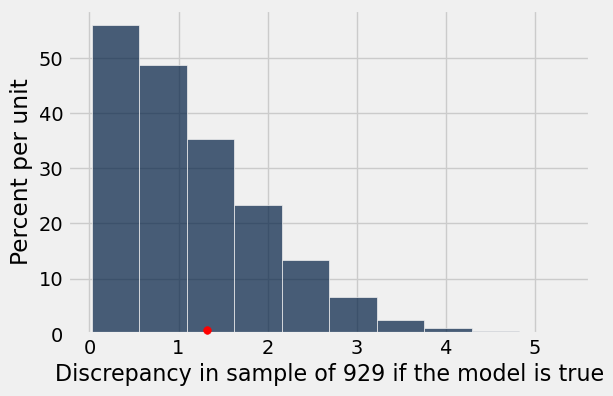

In [28]:
# Plot the discrepancy in a sample of 929 if the model is true
Table().with_column('Discrepancy in sample of 929 if the model is true', new_purples).hist()

# Plotting details; ignore this code
plots.scatter(new_observed_purples, 0.007, color='red', s=30, zorder=10);